#problem statement
#Build a simple linear regression model by performing EDA and do necessary transformation and select the best model using python
#Salary_hike  ->  Build prediction model for salary_hike

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("C:\\Users\\GANESH\\Downloads\\Salary_Data.csv")

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [6]:
import seaborn as sns

C:\Users\GANESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

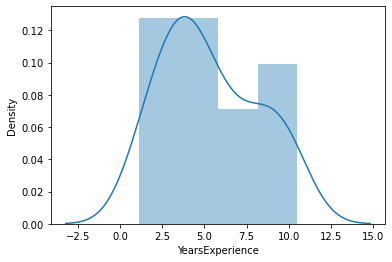

In [9]:
sns.distplot(data['YearsExperience'])

C:\Users\GANESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

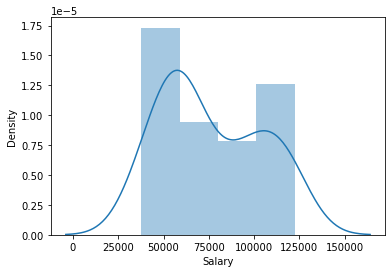

In [7]:
sns.distplot(data['Salary'])

In [8]:
import statsmodels.formula.api as smf

In [9]:
model=smf.ols('Salary~YearsExperience',data=data).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

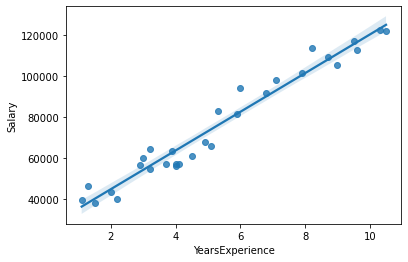

In [10]:
sns.regplot(x="YearsExperience",y="Salary",data=data)

In [11]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
model.tvalues,model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [13]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Manual prediction for 3 years of experience

In [14]:
Salary=(25792.200199)+(9449.962321)*3

In [15]:
Salary

54142.087162

Automatic prediction for 3 to 5 years of experience

In [16]:
new_data=pd.Series([3,5])

In [17]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])

In [18]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

By using log transformation

In [19]:
import numpy as np
data1 = np.log(data)
#y = np.log()

In [20]:
data1

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [22]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.951428
Salary,0.951428,1.000000


In [23]:
model=smf.ols('Salary~YearsExperience',data=data1).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

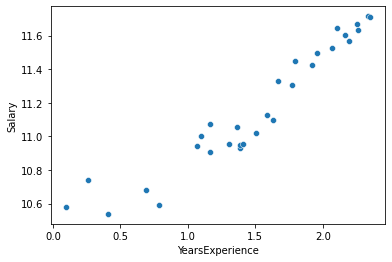

In [25]:
sns.scatterplot(x="YearsExperience",y="Salary",data=data1)

In [26]:
model.params

Intercept          10.328043
YearsExperience     0.562089
dtype: float64

In [27]:
print(model.tvalues, '\n', model.pvalues)

Intercept          184.867959
YearsExperience     16.352542
dtype: float64 
 Intercept          9.073132e-45
YearsExperience    7.395278e-16
dtype: float64


In [28]:
(model.rsquared,model.rsquared_adj)

(0.905215072581715, 0.9018298966024905)

The transformed "rsquared value" is smaller than the raw-score rsquared,